# **DBSCAN**

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
# https://www.kaggle.com/datasets/shwetabh123/mall-customers
df = pd.read_csv("Mall_Customers.csv")

In [223]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


---
## EDA

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [225]:
df.drop("CustomerID", axis=1, inplace=True)

In [226]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

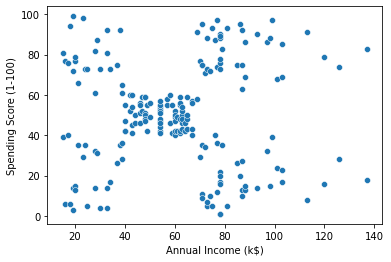

In [227]:
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)", data=df)

<AxesSubplot:xlabel='Genre', ylabel='count'>

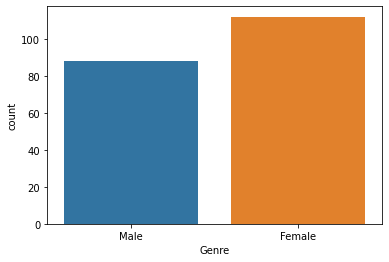

In [228]:
sns.countplot(x="Genre", data=df)

In [229]:
df["Genre"].value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

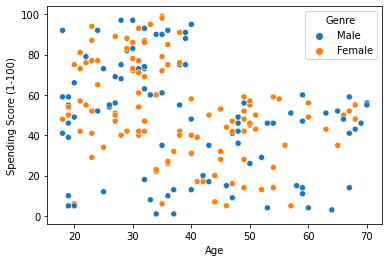

In [230]:
sns.scatterplot(x="Age",y="Spending Score (1-100)", data=df, hue="Genre")

<AxesSubplot:xlabel='Genre', ylabel='Spending Score (1-100)'>

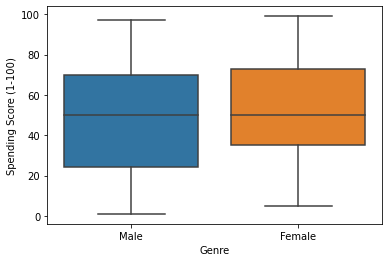

In [231]:
sns.boxplot(x=df['Genre'], y=df['Spending Score (1-100)'])

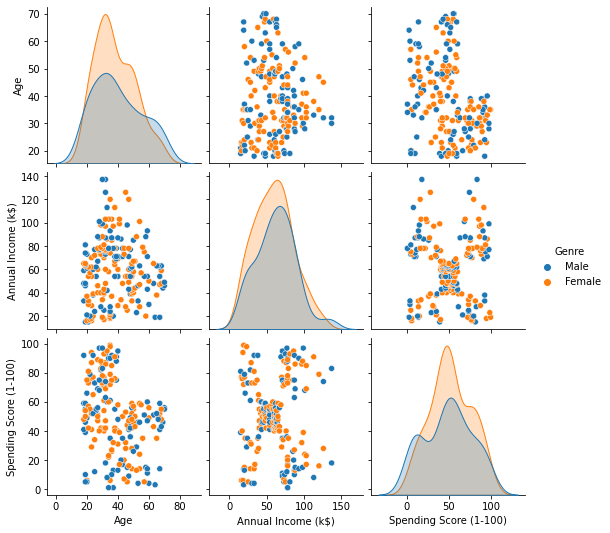

In [232]:
sns.pairplot(df, hue="Genre")

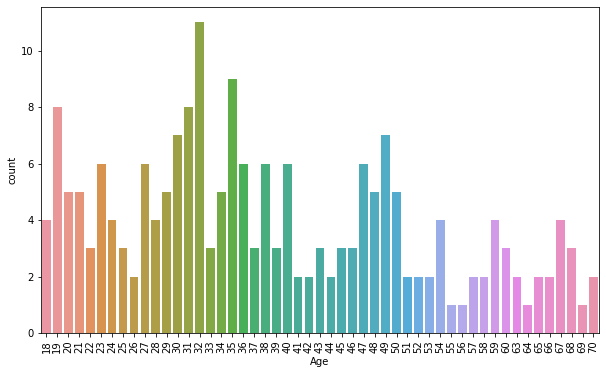

In [233]:
plt.figure(figsize=(10,6))
sns.countplot(x= df["Age"])
plt.xticks(rotation=90);

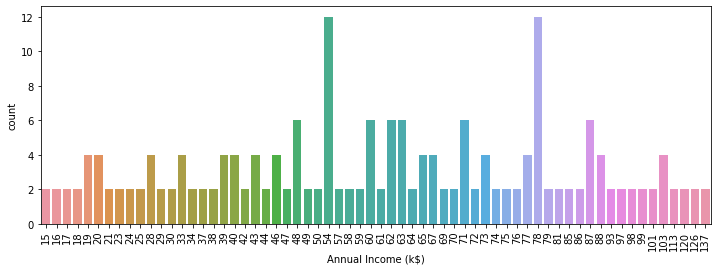

In [234]:
plt.figure(figsize=(12,4))
sns.countplot(x= df['Annual Income (k$)'])
plt.xticks(rotation=90);

In [235]:
df = pd.get_dummies(df, drop_first=True)

In [236]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [237]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
Age,1.000000,-0.012398,-0.327227,0.060867
Annual Income (k$),-0.012398,1.000000,0.009903,0.056410
Spending Score (1-100),-0.327227,0.009903,1.000000,-0.058109
Genre_Male,0.060867,0.056410,-0.058109,1.000000


<AxesSubplot:>

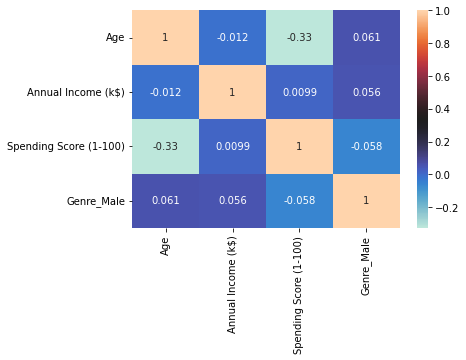

In [238]:
sns.heatmap(df.corr(), annot=True, cmap="icefire")

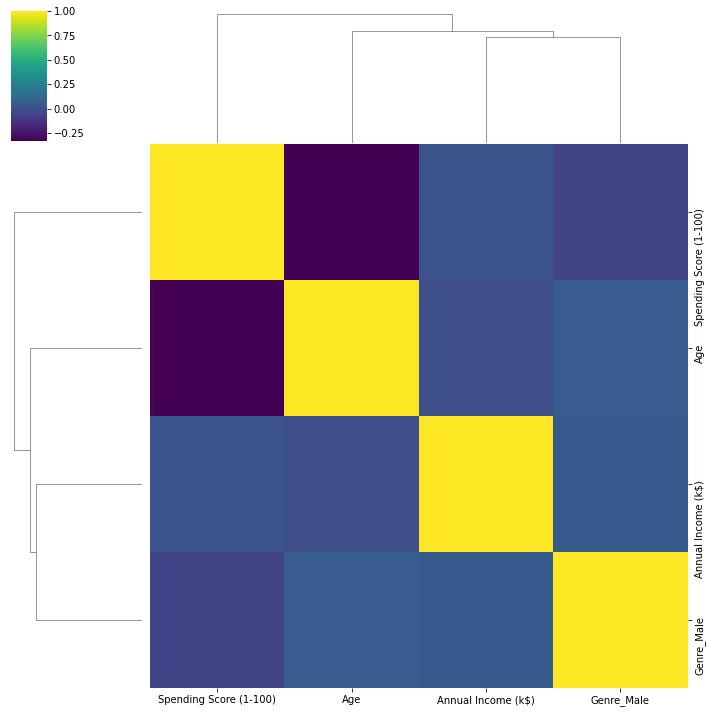

In [239]:
sns.clustermap(df.corr(), cmap="viridis")

---
## Modelleme

In [240]:
from sklearn.preprocessing import StandardScaler

In [241]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [242]:
scaled_df

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

In [243]:
from sklearn.cluster import DBSCAN

In [244]:
yuzde_deger = []

for eps in np.arange(0.01,4,0.01):
    
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(scaled_df)
    
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    yuzde_deger.append(perc_outliers)

(0.0, 10.0)

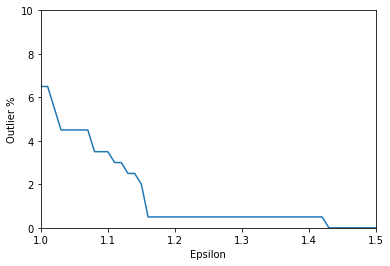

In [245]:
sns.lineplot(x=np.arange(0.01,4,0.01),y=yuzde_deger)
plt.ylabel("Outlier %")
plt.xlabel("Epsilon")

plt.xlim(1,1.5)
plt.ylim(0,10)

---
## Final Model

In [246]:
dbscan = DBSCAN(eps=1.4)
dbscan.fit(scaled_df)

DBSCAN(eps=1.4)

In [247]:
np.unique(dbscan.labels_)

array([-1,  0,  1], dtype=int64)

In [248]:
np.array(np.unique(dbscan.labels_, return_counts=True)).T

array([[ -1,   1],
       [  0,  87],
       [  1, 112]], dtype=int64)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

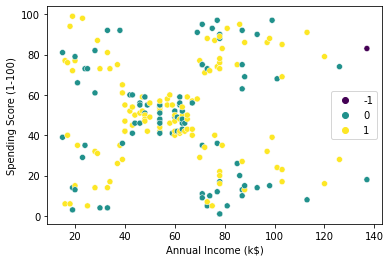

In [249]:
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",
 data=df, hue=dbscan.labels_, palette="viridis")

---
## Etiketleri Veri ile Birleştirmek

In [250]:
df["Grup"] = dbscan.labels_

In [251]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,Grup
0,19,15,39,1,0
1,21,15,81,1,0
2,20,16,6,0,1
3,23,16,77,0,1
4,31,17,40,0,1


In [252]:
ort_df = df.groupby("Grup").mean()

In [253]:
ort_df

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
Grup,,,,
-1,30.000000,137.000000,83.000000,1.0
0,39.919540,61.367816,48.114943,1.0
1,38.098214,59.250000,51.526786,0.0


In [254]:
from sklearn.preprocessing import MinMaxScaler

In [255]:
scaled_ort = scaler.fit_transform(ort_df)
scaled_ort_df = pd.DataFrame(scaled_ort, ort_df.index, ort_df.columns)

In [256]:
scaled_ort_df

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
Grup,,,,
-1,-1.393023,1.413809,1.408639,0.707107
0,0.907733,-0.677623,-0.812958,0.707107
1,0.485291,-0.736186,-0.595681,-1.414214


<AxesSubplot:ylabel='Grup'>

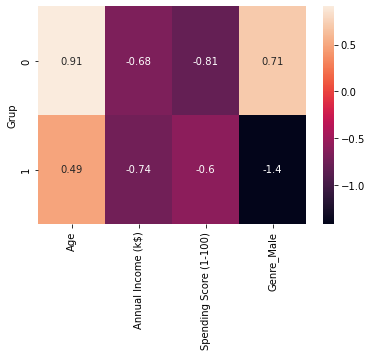

In [257]:
sns.heatmap(scaled_ort_df.loc[[0,1]], annot=True)

# **https://www.youtube.com/watch?v=S8mtVKJ9YDM**